<div style="padding:15px;
            border: solid 2px;
            border-radius: 10px;
            border-color:#000000;
            background-color:#87CEFA;
            font-family:Verdana;
            font-size:12px;"> 
    <h1 id='introduction' style="text-align:center;">
        <b> N Queens Puzzle </b>
        <a class="anchor-link" href="https://www.kaggle.com/code/pawkooo13/nqueens-puzzle/notebook#introduction">¶</a>
    </h1>
</div>

<p style='font-size: 16px; 
          text-align: justify;
          text-justify: inter-word'>
N queens puzzle to problem umieszczenia N hetmanów na szachownicy o rozmiarze N × N, tak aby żadne dwa hetmany nie atakowały siebie. W związku z tym rozwiązanie wymaga, aby żadne dwa hetmany nie znajdowały się w tym samym rzędzie, kolumnie ani po przekątnej. Rozwiązania tego problemu istnieją dla wszystkich liczb naturalnych N z wyjątkiem n = 2 i n = 3, chociaż dokładna liczba rozwiązań jest znana tylko dla N ≤ 27.
</p>

<p style='font-size: 16px; 
          text-align: justify;
          text-justify: inter-word'>
Problem ten można rozwiązać za pomocą algorytmu genetycznego. Szachownice rozmiaru N x N możemy zakodować jako liste, która będzie zawierała liczby 0 i 1. 0 - puste pole, 1 - pole zajęte przez hetmana. Funkcje fitness można określić na podstawie założeń problemu. Wartość funkcji fitness musi uwzględniać ilość hetmanów na szachownicy oraz to czy hetmany atakują siebie wzajemnie. Ilosć hetmanów na szachownicy N x N musi wynosić dokładnie N zatem dobrym pomysłem jest przyjęcie wzoru:
</p>

<div style='text-align: center'>
$
\begin{equation}
\large fitness = |n_{queens} - n|
\end{equation}
$
</div>

$
n_{queens} - ilość \, hetmanów \, na \, szachownicy \\
n - docelowa \, ilość \, hetmanów \\
$

<p style='font-size: 16px; 
          text-align: justify;
          text-justify: inter-word'>
Uwzględnia on sytuację, w której jest za dużo hetmanów na szachownicy jak i sytuację, w której jest ich za mało. Aby wartość funkcji fitness uwzględniała wszystkiego założenia problemu do powyższego wzoru trzeba dodać ilość atakujących siebie hetmanów. 
</p>

<div style='text-align: center;'>
$
\begin{equation}
\large fitness = |n_{queens} - n| + n_{queens_{atc}}
\end{equation}
$
</div>

$
n_{queens} - ilość \, hetmanów \, na \, szachownicy \\
n - docelowa \, ilość \, hetmanów \\
n_{queens_{atc}} - ilość \, atakujących \, siebie \, hetmanów \\
$

In [6]:
pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.3 MB/s eta 0:00:00eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pygad
import math
import matplotlib.pyplot as plt
import time
import pandas as pd

In [8]:
class QueensPuzzle:
    
    @staticmethod
    def get_queens_indexes(solution):
        indexes = []
        n = solution.shape[0]
        for y in range(n):
            for x in range(n):
                if solution[y][x] == 1:
                    indexes.append([y,x])

        return indexes
    
    @staticmethod
    def check_vertically(solution, y, x):
        penalty = 0
        n = solution.shape[0]
        for i in range(n):
            if i != y and solution[i][x] == 1:
                penalty += 1

        return penalty
    
    @staticmethod
    def check_horizontally(solution, y, x):
        penalty = 0
        n = solution.shape[0]
        for i in range(n):
                if i != x and solution[y][i] == 1:
                    penalty += 1

        return penalty
    
    @staticmethod
    def check_diagonally(solution, y, x):
        penalty = 0
        n = solution.shape[0]

        step = 1
        x_idx = x
        y_idx = y
        while(x_idx != 0 and y_idx < n-1):
            x_idx = x - step
            y_idx = y + step
            if solution[y_idx][x_idx] == 1:
                penalty += 1
            step += 1

        step = 1
        x_idx = x
        y_idx = y
        while(x_idx != 0 and y_idx != 0):
            x_idx = x - step
            y_idx = y - step
            if solution[y_idx][x_idx] == 1:
                penalty += 1
            step += 1

        step = 1
        x_idx = x
        y_idx = y
        while(x_idx < n-1 and y_idx != 0):
            x_idx = x + step
            y_idx = y - step
            if solution[y_idx][x_idx] == 1:
                penalty += 1
            step += 1

        step = 1
        x_idx = x
        y_idx = y
        while(x_idx < n-1 and y_idx < n-1):
            x_idx = x + step
            y_idx = y + step
            if solution[y_idx][x_idx] == 1:
                penalty += 1
            step += 1

        return penalty
    
    def calc_penalty(self, solution):
        n = int(math.sqrt(len(solution)))
        solution = solution.reshape((n, n))

        penalty = 0
        indexes = QueensPuzzle.get_queens_indexes(solution)

        for y, x in indexes:
            penalty_v = QueensPuzzle.check_vertically(solution, y, x)
            penalty_h = QueensPuzzle.check_horizontally(solution, y, x)
            penalty_d = QueensPuzzle.check_diagonally(solution, y, x)

            penalty += penalty_v + penalty_h + penalty_d

        return penalty

<p style='font-size: 16px; 
          text-align: justify;
          text-justify: inter-word'>
W funkcji <b> calc_penalty </b> zakodowany chromosom jest przekształcany z 1D na 2D, tak aby wygodniej było sprawdzać poszczególne indeksy za pomocą funkcji <b> get_queens_indexes </b>. Następnie określana jest wstępna wartość kary - zmienna penalty - na podstawie przyjętego wcześniej wzoru. Aby określić ostateczną wartość kary, rozstawione na szachownicy hetmany są sprawdzane pod kątem założeń problemu. Kara jest naliczana kiedy dwa hetmany są w tej samej kolumnie, wierszu bądź na tej samej przekątnej. Na koniec wartości kar są sumowane dając ostateczną wartość.
</p>

In [9]:
def plot_chessboard(solution):
    n = int(math.sqrt(len(solution)))
    solution = solution.reshape(n, n)
    for i in range(n):
        for j in range(n):
            if solution[i][j] == 0:
                sign = 'X'
            else:
                sign = 'Q' 
            if j+1 < n:
                print(sign, end = ' ')
            else:
                print(sign, end = '\n')

In [10]:
QP = QueensPuzzle()

def fitness_function(ga_instance, solution, solution_idx):
    n_queens = np.count_nonzero(solution)
    n = int(math.sqrt(len(solution)))

    fitness_n = abs(n_queens - n)
    fitness_atc = QP.calc_penalty(solution)
    fitness = fitness_n + fitness_atc
    
    return -fitness

def find_solution(n, sol_per_pop, num_parents_mating, num_generations, keep_parents, mutation_percent_genes, silent_mode=False):
    
    gene_space = [0, 1]
    num_genes = n*n
    parent_selection_type = "sss"
    crossover_type = "single_point"
    mutation_type = "random"
        
    ga_instance = pygad.GA(gene_space=gene_space,
                           num_generations=num_generations,
                           num_parents_mating=num_parents_mating,
                           fitness_func=fitness_function,
                           sol_per_pop=sol_per_pop,
                           num_genes=num_genes,
                           parent_selection_type=parent_selection_type,
                           keep_parents=keep_parents,
                           crossover_type=crossover_type,
                           mutation_type=mutation_type,
                           mutation_percent_genes=mutation_percent_genes,
                           stop_criteria='reach_0',
                           random_seed=13,
                           suppress_warnings=True)
    
    ga_instance.run()
    solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
        
    if silent_mode==False:
        print(f"Parameters of the best solution : {solution}")
        print(f"Fitness value of the best solution = {solution_fitness}")
        ga_instance.plot_fitness()
        plot_chessboard(solution)
        
    return {'solution': solution, 'solution_fitness': solution_fitness}

Parameters of the best solution : [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Fitness value of the best solution = -3


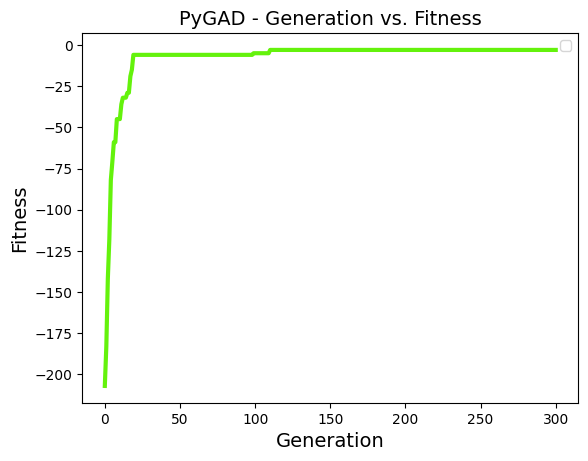

X X X X Q X X X
Q X X X X X X X
X X X Q X X X X
X X X X X X X X
X X X X X X X Q
X X Q X X X X X
Q X X X X X X X
X X X X X Q X X


{'solution': array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'solution_fitness': -3}

In [11]:
find_solution(n=8, 
              sol_per_pop=80, 
              num_parents_mating=40, 
              num_generations=300, 
              keep_parents=8, 
              mutation_percent_genes=5)

In [12]:
def find_optimal_mutation(n):    
    mutations = {'low': 1.5, 'medium': 3, 'high': 5}
    fitness_values = {'low': [], 'medium': [], 'high': []}

    for level in mutations.keys():
        fitness = []
        for i in range(30):
            fitness.append(find_solution(n=n,
                                         sol_per_pop=n*15, 
                                         num_parents_mating=n*5, 
                                         num_generations=300, 
                                         keep_parents=n, 
                                         mutation_percent_genes=mutations[level],
                                         silent_mode=True)['solution_fitness'])

        fitness_values[level] = fitness

    return (mutations, fitness_values)

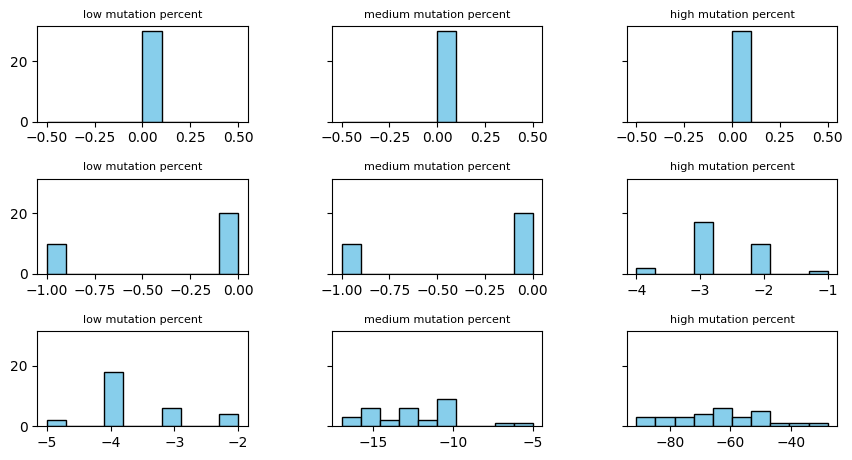

In [13]:
N = [4, 8, 12]

fig, ax = plt.subplots(3, 3, sharey = True, figsize = (10,5))

i = 0
for n in N:
    mutations, fitness_values = find_optimal_mutation(n=n)
    
    j = 0
    for mutation_level in mutations:
        ax[i, j].hist(fitness_values[mutation_level], 
                      color='skyblue', 
                      edgecolor='black')
        
        ax[i, j].set_title(mutation_level + ' mutation percent', 
                           fontsize=8)
        j += 1
        
    i += 1
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
plt.show()

In [21]:
def efficiency_summary(values, times):
    unique_values, counts = np.unique(values, return_counts=True)
    
    print('Średni czas rozwiązania:', np.mean(times))
    print('Procent rozwiązań:', (values.count(0)/len(values))*100, '%')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
    
    ax1.bar(unique_values, counts, color = 'skyblue', edgecolor = 'black')
    ax1.set_title('Fitness value', fontsize=10)

    ax2.hist(times, color = 'skyblue', edgecolor = 'black')
    ax2.set_title('Time', fontsize=10)

    plt.show()
    

def get_efficiency(n, mutation_percent_genes):
    times = []
    values = []
    
    for _ in range(30):
        start = time.time()
        values.append(find_solution(n=n,
                                    sol_per_pop=n*15, 
                                    num_parents_mating=n*5, 
                                    num_generations=300, 
                                    keep_parents=n, 
                                    mutation_percent_genes=mutation_percent_genes,
                                    silent_mode=True)['solution_fitness'])
        
        end = time.time()
        times.append(end - start)

    efficiency_summary(values, times)

Średni czas rozwiązania: 0.07826246420542399
Procent rozwiązań: 100.0 %


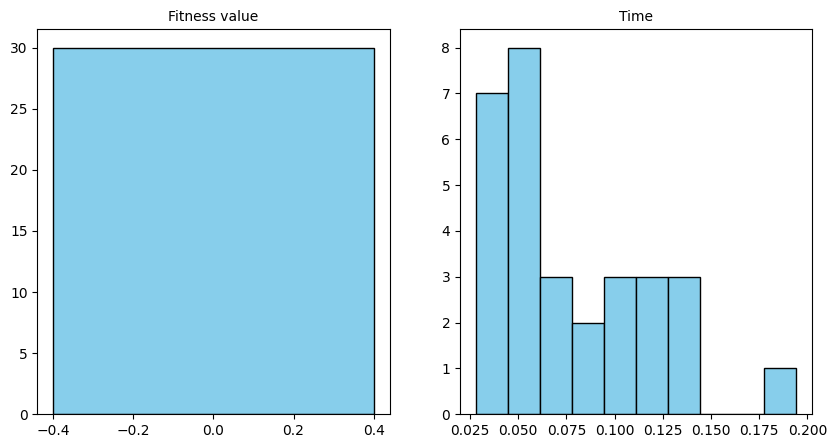

In [22]:
get_efficiency(n=4, mutation_percent_genes=2)

Średni czas rozwiązania: 5.668943977355957
Procent rozwiązań: 86.66666666666667 %


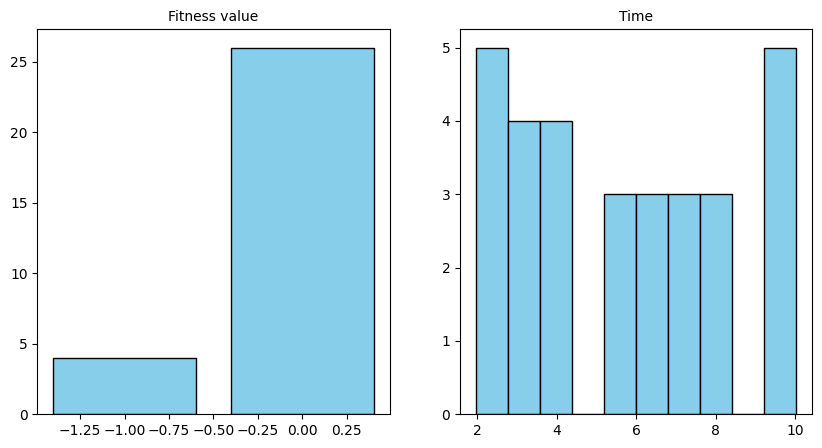

In [23]:
get_efficiency(n=8, mutation_percent_genes=2)

Średni czas rozwiązania: 36.08613344828288
Procent rozwiązań: 0.0 %


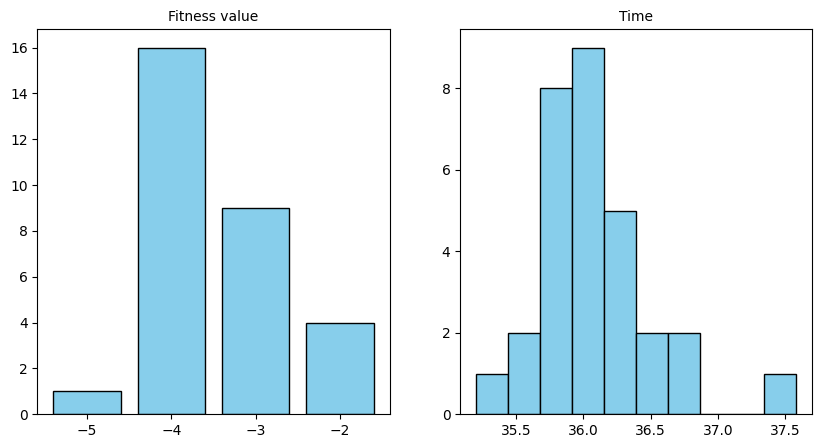

In [24]:
get_efficiency(n=12, mutation_percent_genes=2)

<p style='font-size: 16px; 
          text-align: justify;
          text-justify: inter-word'>
Algorytm genetyczny rozwiązuje ten problem dosyć dobrze dla małych N. Dla N > 8 funkcja fitness wiele razy zwraca wartość -1, -2 - ilość hetmanów rozstawionych na szachownicy nie wynosi wtedy dokładnie N dla szachownicy rozmiaru N x N. Wartość funkcji fitness jest zmniejszana o X w przypadku gdy jest o X za dużo hetmanów jak i w sytuacji, w której jest X za mało rozstawionych hetmanów. Można więc spróbować poprawić funkcję fitness tak aby odejmowane było więcej punktów gdy rozstawionych jest za mało hetmanów.
</p>

\begin{equation}
  fitness =
    \begin{cases}
      n_{queens} - n & \text{$n_{queens}$ $\geq$ n}\\
      3 \cdot (n - n_{queens}) & \text{$n_{queens}$ < n}\\
    \end{cases}       
\end{equation}

In [25]:
QP = QueensPuzzle()

def weighted_fitness_function(ga_instance, solution, solution_idx):
    n_queens = np.count_nonzero(solution)
    n = int(math.sqrt(len(solution)))
    
    if n_queens < n:
        fitness_n = 3*(n-n_queens)
    else:
        fitness_n = n_queens-n
        
    fitness_atc = QP.calc_penalty(solution)
    fitness = fitness_n + fitness_atc
    
    return -fitness

def find_solution_weighted_f(n, sol_per_pop, num_parents_mating, num_generations, keep_parents, mutation_percent_genes, silent_mode=False):
    
    gene_space = [0, 1]
    num_genes = n*n
    parent_selection_type = "sss"
    crossover_type = "single_point"
    mutation_type = "random"
        
    ga_instance = pygad.GA(gene_space=gene_space,
                           num_generations=num_generations,
                           num_parents_mating=num_parents_mating,
                           fitness_func=weighted_fitness_function,
                           sol_per_pop=sol_per_pop,
                           num_genes=num_genes,
                           parent_selection_type=parent_selection_type,
                           keep_parents=keep_parents,
                           crossover_type=crossover_type,
                           mutation_type=mutation_type,
                           mutation_percent_genes=mutation_percent_genes,
                           stop_criteria='reach_0',
                           random_seed=13,
                           suppress_warnings=True)
    
    ga_instance.run()
    solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
        
    if silent_mode==False:
        print(f"Parameters of the best solution : {solution}")
        print(f"Fitness value of the best solution = {solution_fitness}")
        ga_instance.plot_fitness()
        plot_chessboard(solution)
        
    return {'solution': solution, 'solution_fitness': solution_fitness}

Parameters of the best solution : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Fitness value of the best solution = -2


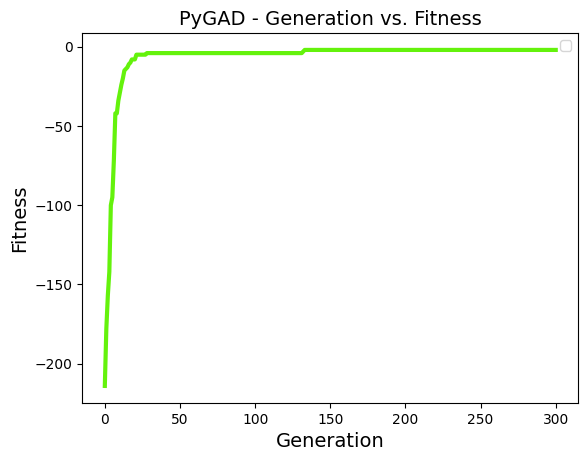

X X X X X X X X
X X X X X X Q X
X X X Q X X X X
Q X X X X Q X X
X X X X X X X Q
X Q X X X X X X
X X X X Q X X X
X X Q X X X X X


{'solution': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'solution_fitness': -2}

In [26]:
find_solution_weighted_f(n=8, 
                         sol_per_pop=80, 
                         num_parents_mating=40, 
                         num_generations=300, 
                         keep_parents=8, 
                         mutation_percent_genes=2)

In [27]:
def get_efficiency_weighted_f(n, mutation_percent_genes):
    times = []
    values = []
    
    for _ in range(30):
        start = time.time()
        fitness_value = find_solution_weighted_f(n=n,
                                                 sol_per_pop=n*15, 
                                                 num_parents_mating=n*5, 
                                                 num_generations=300, 
                                                 keep_parents=n, 
                                                 mutation_percent_genes=mutation_percent_genes,
                                                 silent_mode=True)['solution_fitness']
        values.append(fitness_value)
        
        end = time.time()
        times.append(end - start)

    efficiency_summary(values, times)

Średni czas rozwiązania: 0.0803567886352539
Procent rozwiązań: 100.0 %


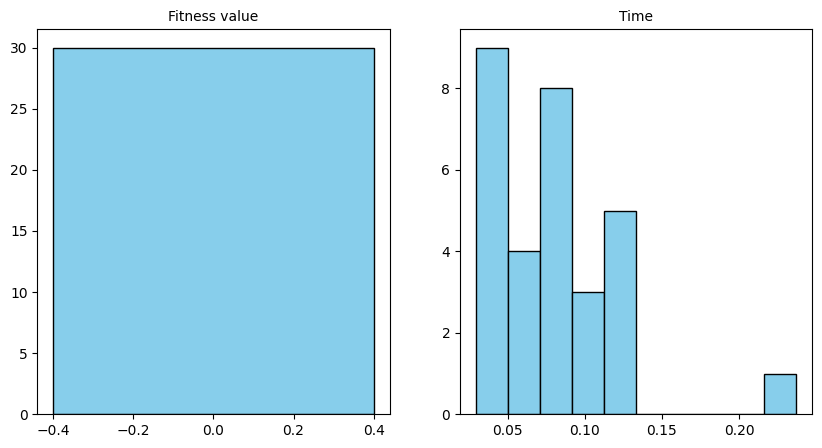

In [53]:
get_efficiency_weighted_f(n=4, mutation_percent_genes=2)

Średni czas rozwiązania: 7.406811126073202
Procent rozwiązań: 66.66666666666666 %


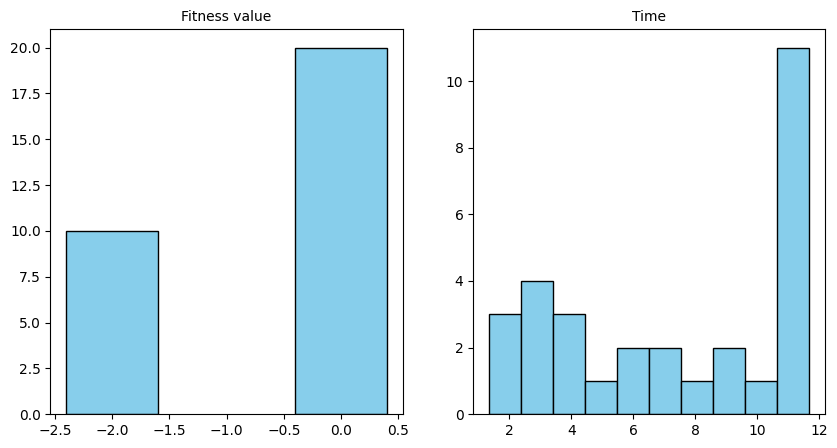

In [29]:
get_efficiency_weighted_f(n=8, mutation_percent_genes=2)

Średni czas rozwiązania: 51.09024838606516
Procent rozwiązań: 0.0 %


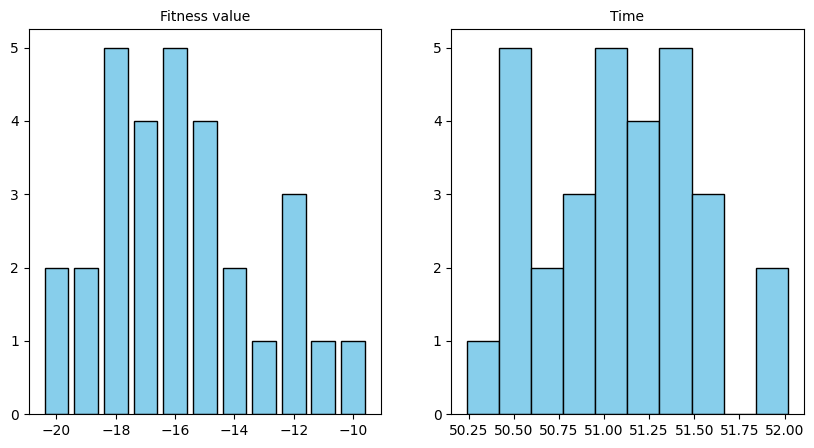

In [30]:
get_efficiency_weighted_f(n=12, mutation_percent_genes=3)

<p style='font-size: 16px; 
          text-align: justify;
          text-justify: inter-word'>
Po wprowadzonych zmianach algorytm genetyczny radzi sobie gorzej niż wcześniej. Dokładność rozwiązań zmniejszyła się o parę punktów procenotwych dla N = 8 oraz N = 12. Średni czas znalezienia rozwiązania wzrósł w każdym przypadku.
</p>

<p style='font-size: 16px; 
          text-align: justify;
          text-justify: inter-word'>
Wyżej przedstawione podejścia do rozwiązania tego problemu nie są za bardzo optymalne. Generowanie chromosomów długości N * N jest słabym pomysłem, ponieważ problem da się uprościć. Pola jakie pokrywa jeden hetman to między innymi cała kolumna i wiersz, zatem każdy hetman musi znajdować się w innej kolumnie i wierszu. Można więc uprościć chromosom do długości N przyjmując, że każdy hetman jest w innej kolumnie i znaleźć dla każdego hetmana odpowiedni wiersz tak aby się wzajemnie nie atakowały. Takie rozwiązanie jest bardziej wydajne i można je zakodować przyjmując: 
</p>

<p>
    <b> num_genes = N </b>
</p>

<p>
    <b> gene_space = [0, ..., N-1] </b> 
</p>

<p style='font-size: 16px; 
          text-align: justify;
          text-justify: inter-word'>
Zaletą takiego rozwiązania jest otrzymywanie za każdym razem dokładnej ilości rozstawionych hetmanów na szachownicy.
</p>

In [62]:
def expand_solution(solution):
    n = len(solution)
    queen_indexes = [[i, int(solution[i])] for i in range(n)]

    solution_2D = np.zeros(shape=(n, n), dtype=int)
    
    for y, x in queen_indexes:
        solution_2D[y, x] = 1
    
    return solution_2D.flatten()

In [63]:
QP = QueensPuzzle()

def fitness_function_simplified(ga_instance, solution, solution_idx):
    solution = expand_solution(solution)
    fitness = QP.calc_penalty(solution)
        
    return -fitness

def find_solution_simplified(n, sol_per_pop, num_parents_mating, num_generations, keep_parents, mutation_percent_genes, silent_mode=False):
    gene_space = np.arange(0, n, 1, dtype=int)
    num_genes = n
    parent_selection_type = "sss"
    crossover_type = "single_point"
    mutation_type = "random"
    
    ga_instance = pygad.GA(gene_space=gene_space,
                           num_generations=num_generations,
                           num_parents_mating=num_parents_mating,
                           fitness_func=fitness_function_simplified,
                           sol_per_pop=sol_per_pop,
                           num_genes=num_genes,
                           parent_selection_type=parent_selection_type,
                           keep_parents=keep_parents,
                           crossover_type=crossover_type,
                           mutation_type=mutation_type,
                           mutation_percent_genes=mutation_percent_genes,
                           stop_criteria='reach_0',
                           random_seed=13,
                           suppress_warnings=True)
    
    ga_instance.run()
    solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
    
    if silent_mode==False:
        print(f"Parameters of the best solution : {solution}")
        print(f"Fitness value of the best solution = {solution_fitness}")
        ga_instance.plot_fitness()
        plot_chessboard(expand_solution(solution))
        
    return {'solution': solution, 'solution_fitness': solution_fitness}

Parameters of the best solution : [5. 3. 6. 0. 7. 1. 4. 2.]
Fitness value of the best solution = 0


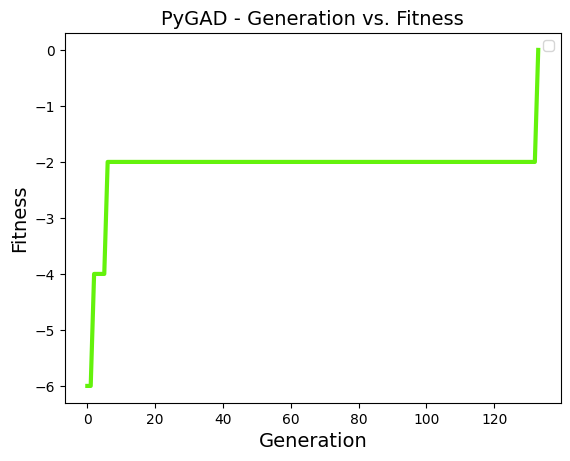

X X X X X Q X X
X X X Q X X X X
X X X X X X Q X
Q X X X X X X X
X X X X X X X Q
X Q X X X X X X
X X X X Q X X X
X X Q X X X X X


{'solution': array([5., 3., 6., 0., 7., 1., 4., 2.]), 'solution_fitness': 0}

In [64]:
find_solution_simplified(n=8, 
                         sol_per_pop=80, 
                         num_parents_mating=40, 
                         num_generations=500, 
                         keep_parents=8, 
                         mutation_percent_genes=2)

In [65]:
def get_efficiency_simplified_f(n, mutation_percent_genes):
    times = []
    values = []
    
    for _ in range(30):
        start = time.time()
        fitness_value = find_solution_simplified(n=n,
                                                 sol_per_pop=n*15, 
                                                 num_parents_mating=n*5, 
                                                 num_generations=500, 
                                                 keep_parents=n, 
                                                 mutation_percent_genes=mutation_percent_genes,
                                                 silent_mode=True)['solution_fitness']
        values.append(fitness_value)
        
        end = time.time()
        times.append(end - start)

    efficiency_summary(values, times)

Średni czas rozwiązania: 0.011245044072469075
Procent rozwiązań: 100.0 %


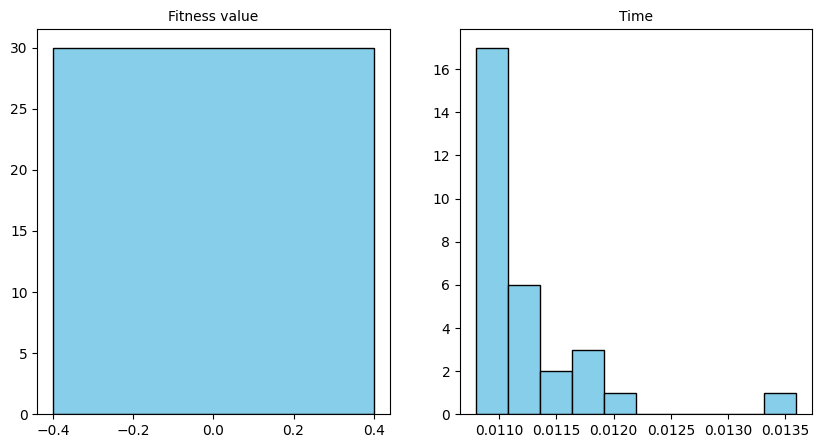

In [66]:
get_efficiency_simplified_f(n=4, mutation_percent_genes=2)

Średni czas rozwiązania: 0.22150450547536213
Procent rozwiązań: 100.0 %


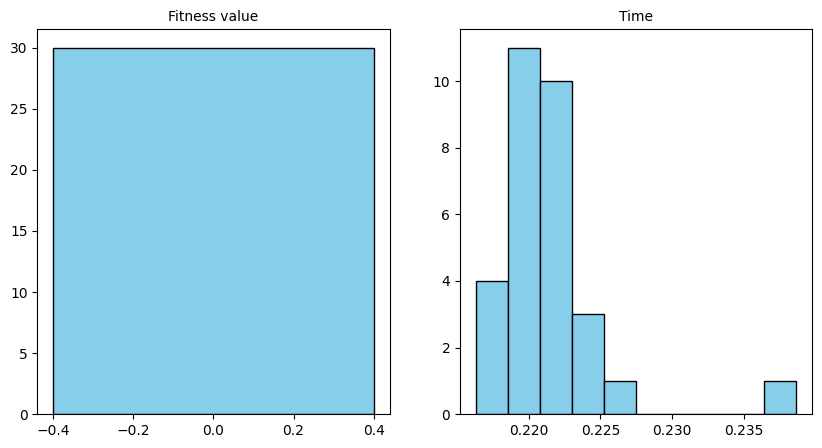

In [67]:
get_efficiency_simplified_f(n=8, mutation_percent_genes=2)

Średni czas rozwiązania: 23.824347869555154
Procent rozwiązań: 100.0 %


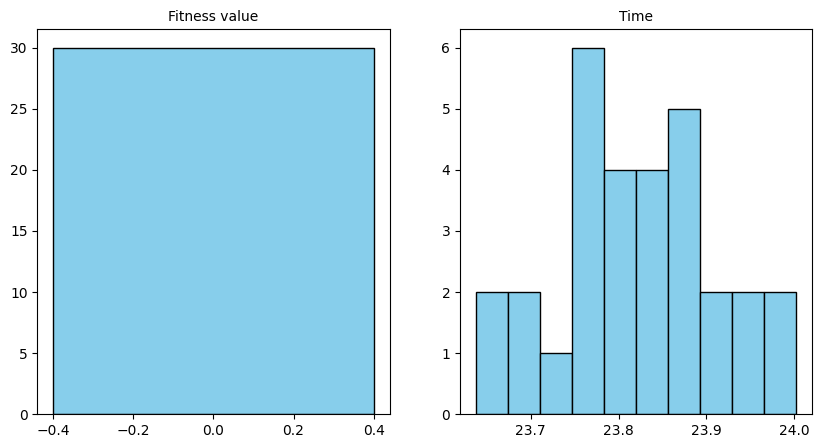

In [68]:
get_efficiency_simplified_f(n=12, mutation_percent_genes=3)

<p style='font-size: 16px; 
          text-align: justify;
          text-justify: inter-word'>
Algorytm genetyczny rozwiązuje problem 'N Queens Puzzle'. W zależności od przyjętych parametrów oraz zdefiniowania funkcji fitness otrzymamy różne wyniki. Najlepiej sprawdził się sposób z przyjęciem założenia o występowaniu każdego hetmana w innej kolumnie. Takie uproszczenie umożliwiło zredukowanie rozmiaru chromosomu co przyczyniło się na lepsze wyniki. Zarówno dokładności jak i czasy rozwiązań na wszystkich testowanych rozmiarach plansz wypadły o wiele lepiej.
</p>

Parameters of the best solution : [16.  6. 13.  9. 17. 12.  7.  1.  3.  0. 18. 14.  8. 10.  4. 19. 15.  2.
 11.  5.]
Fitness value of the best solution = 0


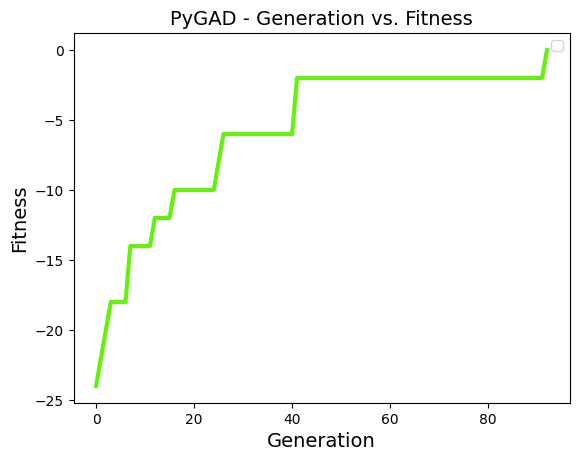

X X X X X X X X X X X X X X X X Q X X X
X X X X X X Q X X X X X X X X X X X X X
X X X X X X X X X X X X X Q X X X X X X
X X X X X X X X X Q X X X X X X X X X X
X X X X X X X X X X X X X X X X X Q X X
X X X X X X X X X X X X Q X X X X X X X
X X X X X X X Q X X X X X X X X X X X X
X Q X X X X X X X X X X X X X X X X X X
X X X Q X X X X X X X X X X X X X X X X
Q X X X X X X X X X X X X X X X X X X X
X X X X X X X X X X X X X X X X X X Q X
X X X X X X X X X X X X X X Q X X X X X
X X X X X X X X Q X X X X X X X X X X X
X X X X X X X X X X Q X X X X X X X X X
X X X X Q X X X X X X X X X X X X X X X
X X X X X X X X X X X X X X X X X X X Q
X X X X X X X X X X X X X X X Q X X X X
X X Q X X X X X X X X X X X X X X X X X
X X X X X X X X X X X Q X X X X X X X X
X X X X X Q X X X X X X X X X X X X X X


{'solution': array([16.,  6., 13.,  9., 17., 12.,  7.,  1.,  3.,  0., 18., 14.,  8.,
        10.,  4., 19., 15.,  2., 11.,  5.]),
 'solution_fitness': 0}

In [75]:
find_solution_simplified(n=20, 
                         sol_per_pop=200, 
                         num_parents_mating=100, 
                         num_generations=500, 
                         keep_parents=15, 
                         mutation_percent_genes=5)

Parameters of the best solution : [16. 28.  3. 11. 19. 14. 12. 18.  4. 23.  0. 24.  9. 20. 13.  7. 26. 17.
 21.  1.  8.  5.  2. 25. 29.  6. 15. 10. 22. 27.]
Fitness value of the best solution = 0


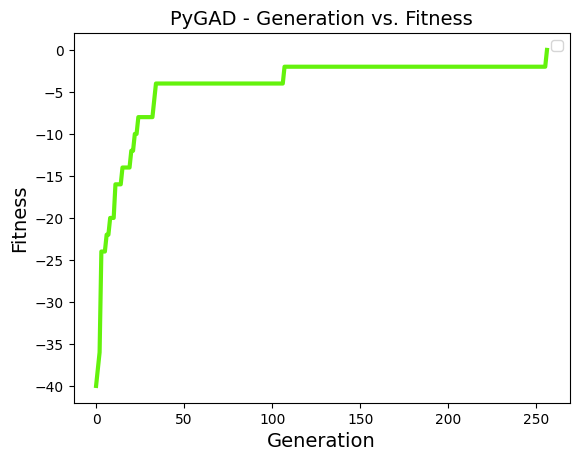

X X X X X X X X X X X X X X X X Q X X X X X X X X X X X X X
X X X X X X X X X X X X X X X X X X X X X X X X X X X X Q X
X X X Q X X X X X X X X X X X X X X X X X X X X X X X X X X
X X X X X X X X X X X Q X X X X X X X X X X X X X X X X X X
X X X X X X X X X X X X X X X X X X X Q X X X X X X X X X X
X X X X X X X X X X X X X X Q X X X X X X X X X X X X X X X
X X X X X X X X X X X X Q X X X X X X X X X X X X X X X X X
X X X X X X X X X X X X X X X X X X Q X X X X X X X X X X X
X X X X Q X X X X X X X X X X X X X X X X X X X X X X X X X
X X X X X X X X X X X X X X X X X X X X X X X Q X X X X X X
Q X X X X X X X X X X X X X X X X X X X X X X X X X X X X X
X X X X X X X X X X X X X X X X X X X X X X X X Q X X X X X
X X X X X X X X X Q X X X X X X X X X X X X X X X X X X X X
X X X X X X X X X X X X X X X X X X X X Q X X X X X X X X X
X X X X X X X X X X X X X Q X X X X X X X X X X X X X X X X
X X X X X X X Q X X X X X X X X X X X X X X X X X X X X X X
X X X X X X X X X X X X X X X X X X X X 

{'solution': array([16., 28.,  3., 11., 19., 14., 12., 18.,  4., 23.,  0., 24.,  9.,
        20., 13.,  7., 26., 17., 21.,  1.,  8.,  5.,  2., 25., 29.,  6.,
        15., 10., 22., 27.]),
 'solution_fitness': 0}

In [76]:
find_solution_simplified(n=30, 
                         sol_per_pop=300, 
                         num_parents_mating=100, 
                         num_generations=500, 
                         keep_parents=15, 
                         mutation_percent_genes=5)